In [3]:
import numpy as np
import pandas as pd
from collections import Counter

# load dataset
df = pd.read_csv('adult.csv')

In [57]:
### EDA+Insights

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [20]:
# check the label class and it's distribution percentage
label = df.values[:, -1]
counter = Counter(label)
for key, value in counter.items():
    percentage = value / len(label) * 100
    print(f"Class: {key}, Count = {value}, Percentage = {percentage:.1f}%.")

Class:  <=50K, Count = 24720, Percentage = 75.9%.
Class:  >50K, Count = 7841, Percentage = 24.1%.


In [21]:
numerical_subset = df.select_dtypes(include=['int64', 'float64'])

In [22]:
print(numerical_subset)

       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0       39   77516             13          2174             0              40
1       50   83311             13             0             0              13
2       38  215646              9             0             0              40
3       53  234721              7             0             0              40
4       28  338409             13             0             0              40
...    ...     ...            ...           ...           ...             ...
32556   27  257302             12             0             0              38
32557   40  154374              9             0             0              40
32558   58  151910              9             0             0              40
32559   22  201490              9             0             0              20
32560   52  287927              9         15024             0              40

[32561 rows x 6 columns]


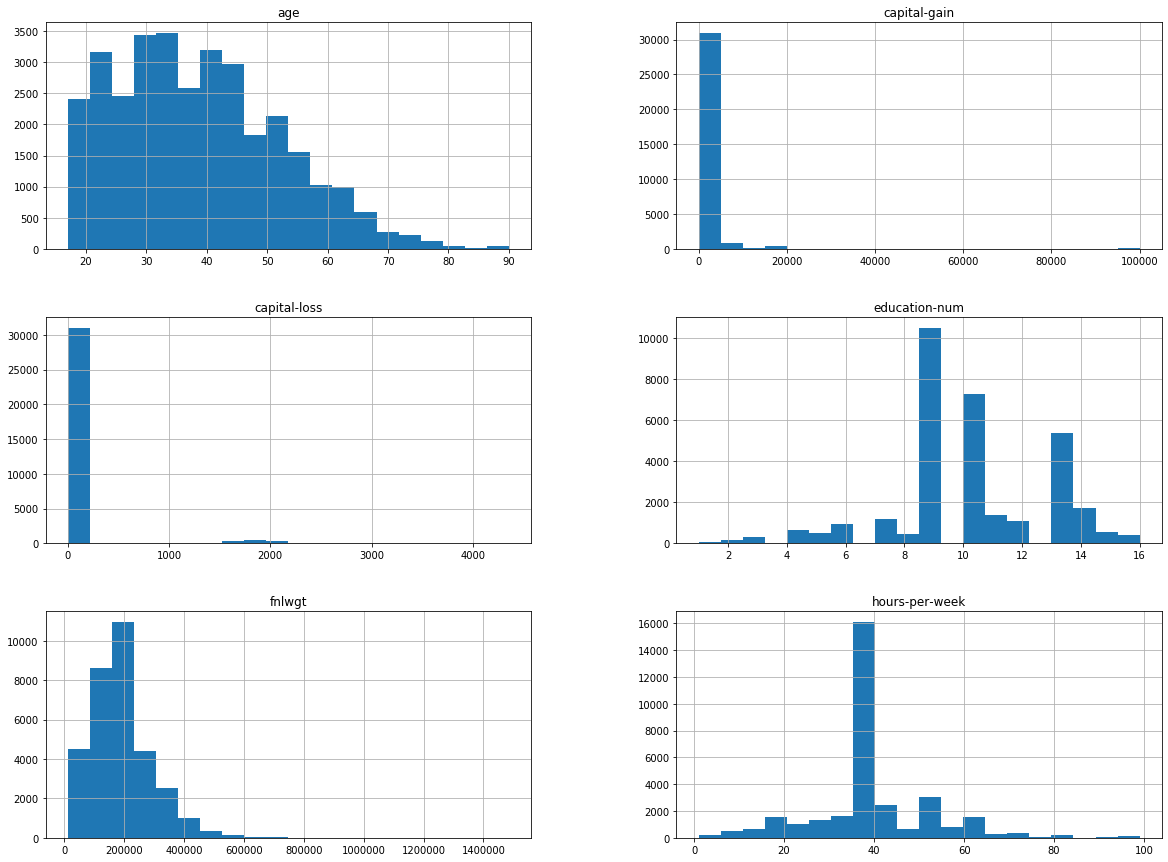

In [23]:
import matplotlib.pyplot as plt
numerical_subset.hist(bins=20, figsize=(20, 15))
plt.show()

In [58]:
#Data Cleaning

In [25]:
#Data Cleaning
# use DataFrame `mode()` method
df = df.fillna(df.mode().iloc[0])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [26]:
# checking the outliers
print(numerical_subset.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [27]:
# check the quantity of this outlier
print(f"There's {df[df['capital-gain'] == 99999].shape[0]} outlier in the capital-gain column")
print(f"There's {df[df['hours-per-week'] == 99].shape[0]} outlier in the hours-per-week column")

There's 159 outlier in the capital-gain column
There's 85 outlier in the hours-per-week column


In [28]:
# replace it with mean value
df['capital-gain'].replace(99999, np.mean(df['capital-gain'].values), inplace=True)
df['hours-per-week'].replace(99, np.mean(df['hours-per-week'].values), inplace=True)
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679    594.601799     87.303830   
std       13.640433  1.055500e+05       2.572720   2554.224665    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  41310.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.284579  
std         11.978418  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         98.000000  


In [54]:
df.to_csv('adult_cleaned.csv', index=False)

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


def load_dataset(filename):
    df = pd.read_csv(filename)
    X, y = df.iloc[:, :-1], df.iloc[:, -1]
    cate_index = X.select_dtypes(include=['object']).columns
    num_index = X.select_dtypes(include=['int64', 'float64']).columns
    y = LabelEncoder().fit_transform(y)
    
    return X, y, cate_index, num_index

def evaluate_model(X, y, model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

    return scores

In [37]:
from sklearn.dummy import DummyClassifier

X, y, cate_index, num_index = load_dataset('adult_cleaned.csv')
model = DummyClassifier(strategy='most_frequent')

In [38]:
scores = evaluate_model(X, y, model)
print(scores)

[0.75898066 0.75921376 0.75921376 0.75921376 0.75921376 0.75921376
 0.75921376 0.75921376 0.75921376 0.75921376 0.75898066 0.75921376
 0.75921376 0.75921376 0.75921376 0.75921376 0.75921376 0.75921376
 0.75921376 0.75921376 0.75898066 0.75921376 0.75921376 0.75921376
 0.75921376 0.75921376 0.75921376 0.75921376 0.75921376 0.75921376]


In [39]:
print(f"The Dummy Classifier mean accuracy: {(np.mean(scores)*100):.2f}%, with Standard Deviation: {np.std(scores):.2f}")

The Dummy Classifier mean accuracy: 75.92%, with Standard Deviation: 0.00


In [40]:
print(f"The type of dataset: {type(X)}.")
print(f"The shape of the dataset: Row: {X.shape[0]}, with {X.shape[1]} fetures")
print(f"The type of the target label: {type(y)}")
print(f"The shape of the target label is: {y.shape[0]} dimensional vector.")

The type of dataset: <class 'pandas.core.frame.DataFrame'>.
The shape of the dataset: Row: 32561, with 14 fetures
The type of the target label: <class 'numpy.ndarray'>
The shape of the target label is: 32561 dimensional vector.


### Model evaluate and Fine tunning

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

def load_dataset(filename):
    df = pd.read_csv(filename)
    X, y = df.iloc[:, :-1], df.iloc[:, -1]
    cate_index = X.select_dtypes(include=['object']).columns
    num_index = X.select_dtypes(include=['int64', 'float64']).columns
    y = LabelEncoder().fit_transform(y)
    return X, y, cate_index, num_index

X, y, cate_index, num_index = load_dataset('adult_cleaned.csv')
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(32561, 14)
<class 'numpy.ndarray'>
(32561,)


#evaluate the following machine learning models on the given dataset:
- Decision Tree (CART)
- Support Vector Machine (SVM)
- Bagged Decision Trees (BAG)
- Random Forest (RF)
- Gradient Boosting Machine (GBM)

In [42]:
def generate_models():
    models, names = [], []
    names.append('CART')
    models.append(DecisionTreeClassifier())
    names.append('SVM')
    models.append(SVC(gamma='scale'))
    names.append('BAG')
    models.append(BaggingClassifier(n_estimators=100))
    names.append('RF')
    models.append(RandomForestClassifier(n_estimators=100))
    names.append('GBM')
    models.append(GradientBoostingClassifier(n_estimators=100))
    names.append('Neural Network')
    models.append(MLPClassifier(early_stopping=True))
    return models, names

models, names = generate_models()

In [55]:
##"encoding" categorical feature into numerical feature using OneHotEncoder

In [43]:
steps = [('Categorical', OneHotEncoder(handle_unknown='ignore'), cate_index), ('Numerical', MinMaxScaler(), num_index)]

from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(steps, verbose=True)
X = transformer.fit_transform(X)

print(type(X))
print(X.shape)

[ColumnTransformer] ... (1 of 2) Processing Categorical, total=   0.1s
[ColumnTransformer] ..... (2 of 2) Processing Numerical, total=   0.0s
<class 'scipy.sparse.csr.csr_matrix'>
(32561, 108)


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22792, 108)
(9769, 108)
(22792,)
(9769,)


In [45]:
# filter unwanted warning
import warnings
warnings.filterwarnings('ignore')

In [46]:
# evaluate each model in default parameters
for i in range(len(models)):
    print(f"""
    ********************************
     Now evaluating {names[i]} model
    ********************************\n""")
    
    scores = evaluate_model(X_train, y_train, models[i])
    print(f"The {names[i]} model average accuracy is: {(np.mean(scores)*100):.2f}%, with Standard Deviation: {(np.std(scores)*100):.2f}.")


    ********************************
     Now evaluating CART model
    ********************************

The CART model average accuracy is: 80.96%, with Standard Deviation: 0.72.

    ********************************
     Now evaluating SVM model
    ********************************

The SVM model average accuracy is: 84.36%, with Standard Deviation: 0.73.

    ********************************
     Now evaluating BAG model
    ********************************

The BAG model average accuracy is: 85.39%, with Standard Deviation: 0.62.

    ********************************
     Now evaluating RF model
    ********************************

The RF model average accuracy is: 85.07%, with Standard Deviation: 0.76.

    ********************************
     Now evaluating GBM model
    ********************************

The GBM model average accuracy is: 86.47%, with Standard Deviation: 0.63.

    ********************************
     Now evaluating Neural Network model
    *****************

### The best two performance algorithms:

- BaggingClassfier(n_estimators=100)
- GradientBoostingClassfier(n_estimators=100)

In [47]:
# fine tune BaggingClassifier

from sklearn.model_selection import GridSearchCV

BAGgrid = {'n_estimators': [100, 200]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42)
BAGclf = BaggingClassifier()
BAGgrid_search = GridSearchCV(estimator=BAGclf, param_grid=BAGgrid, n_jobs=-1, cv=cv, 
                              scoring='accuracy', error_score=0)
BAGgrid_result = BAGgrid_search.fit(X_train, y_train)

In [48]:
print(BAGgrid_result.best_score_)
print(BAGgrid_result.best_params_)

0.8531504064355969
{'n_estimators': 200}


In [49]:
model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, min_samples_split=500, min_samples_leaf=50, 
                                   max_depth=8, max_features='sqrt', subsample=0.8, random_state=42)

model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=50, min_samples_split=500,
                           n_estimators=200, random_state=42, subsample=0.8)

In [50]:
# evaluate the testing subset
TestScore = model.score(X_test, y_test)
print(f"The model test set accuracy is: {(TestScore*100):.1f}%.")

The model test set accuracy is: 87.1%.


In [51]:
# perform the Classification Report
from sklearn.metrics import classification_report

predicted = model.predict(X_test)
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7417
           1       0.77      0.65      0.71      2352

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



In [53]:
# to save the model
import joblib
joblib.dump(model, 'final_model.sav')

['final_model.sav']